In [ ]:
#TO remove :
import os
directory = os.getcwd()
print(directory)

In [ ]:
#os.chdir("Machine_Learning_EPFL-extension-school\Course#2 Data Analysis")
#directory = os.getcwd()
#print(directory)

**Note:**
This notebook covers all the tasks from course 2. 

Some of the functions used have been borrowed from forums. When this is the case, a link to the page is provided in the comments. In most cases, the borrowed codes or functions have been modified to fit the needs of the exercise. 

Task "C" runs slowly, it take more than 30 minutes. In the procedure, I write the file at the end of section C.

<a id="function_def"></a>
### Functions :

In [ ]:
# print a complete table : (source: https://stackoverflow.com/questions/19124601/pretty-print-an-entire-pandas-series-dataframe )
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.options.display.max_colwidth = 150# (source : https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe)
    display(x)
    pd.reset_option('display.max_rows') 
    pd.options.display.max_colwidth = 50 

<a id="top"></a>
# Project Course 2 

### Task : 

- A) [An overview of the dataset](#TaskA)
- B) [Data Cleaning](#TaskB)
- C) [Preliminary Exploratory Data Analysis (EDA)](#TaskC)
- D) [EDA: Text data](#TaskD)
- E) [EDA: Time-series data](#TaskE)
- F) [EDA: Correlation analysis](#TaskF)
- G) [Advanced EDA](#TaskG)


<a id="TaskA"></a>
## OpenFood database : Task A
[top](#top)

The dataset was collected from the Open Food repo, a community-driven open database for barcoded food products. This dataset contains the ingredients and nutritional facts of approximately 385k food products, from several countries worldwide.

- **id:** The ID used by the OpenFood database for this Product.
- **barcode:** Product barcode.
- **ingredients_en:** The ingredients of the Product in English as provided by the manufacturer.
- **quantity:** The dry net weight or volume of the Product. To be used in conjunction with the unit.
- **unit**: The unit used by quantity to measure the weight or volume of the Product (usually g or ml).
- **portion_quantity:** The dry net weight or volume of a serving size of the Product. To be used in conjunction with portion_unit.
- **portion_unit:** The unit used by portion_quantity to measure the weight or volume of a serving size of the Product (usually g or ml).
- **hundred_unit:** The unit used for the “per hundred” product nutrients (usually g or ml).
- **alcohol_by_volume:** The percentage of alcohol in the Product.
- **nutrients:** The Product’s nutrients as described by the manufacturer.
- **created_at:** UTC DateTime at which this Product was added to the OpenFood database.
- **updated_at:** UTC DateTime at which this Product (or one of its subordinate objects, including images nutrients) was last modified.


In [ ]:
#Task A library : 
import pandas as pd

### Tasks : 

- 1.Import the data as a pandas DataFrame into your notebook.
- 2.Check the number of rows and columns. You should have 385’384 samples and 99 columns.
- 3.Display a few entries from the DataFrame.
- 4.Check the data type for each column. Create separate lists to hold the names of columns of the same data type.
- 5.Check the data by the type of information they hold. Create 3 lists that hold _per_hundred, _per_portion and _unit columns. Put the remaining column names in a 4th list named other_cols. Note that you should create these 4 lists without manually selecting the column names.

### 1. Import the data as a pandas DataFrame
We recommend loading it using the pandas read_pickle function and setting the compression parameter to ‘zip’:

In [ ]:
filename = "Ressources/data_385k.pkl"
df = pd.read_pickle(filename, compression='zip') #Un peu long

### 2. Check the number of rows and columns

In [ ]:
df.shape

### 3. Display a few entries from the DataFrame

In [ ]:
df.head()

### 4. Check the data type for each column
``` df.dtypes``` didn't display the type of each column but with this function we will get the type and create lists of columns  per type :

In [ ]:
df.info() #Show the Type for each column 'float64' or 'object'

In [ ]:
df_types = df.dtypes.unique()
myVars = locals()
print("New vars which list column names with the same type :") 
for t in df_types :
    print("df_"+str(t))
    myVars["df_"+str(t)] = list(df.columns[df.dtypes == t])
    

For example the list of column with the type float 64 :

In [ ]:
print(df_float64)

### 5. Check the data by the type of information they hold 

In [ ]:
New_lists = ['_per_hundred', '_per_portion', '_unit', '_other_cols']

print("New variables which list column names with the same type of informations :") 

for suffix in New_lists : # 1 I create the empty variables
    print("df"+str(suffix))
    myVars["df"+str(suffix)] = list()

for colname in  list(df.columns): #each name of column is placed into the different list 
    
    if New_lists[0] in colname :
        myVars["df"+str(New_lists[0])].append(colname) #.split(str(New_lists[0]))[0] # To keep only the part before the suffix
    elif New_lists[1] in colname :
        myVars["df"+str(New_lists[1])].append(colname)
    elif New_lists[2] in colname :
        myVars["df"+str(New_lists[2])].append(colname)
    else :
        myVars["df"+str(New_lists[3])].append(colname)
        
 

In [ ]:
print(df_per_hundred)

In [ ]:
print(df_other_cols) 

<a id="TaskB"></a>
## OpenFood database: Task B
[top](#top)

### Data Cleaning Tasks:

- 1. Are there any duplicate entries ? Can we remove them ? What is the shape of the remaining data?
- 2. This data set contains a lot of missing values. Find out where they are: 
    - a) Create a table that shows both the number and the percentage of missing values for all columns sorted from largest to smallest. Make sure all the column names are visible.
    - b) In the subject on “Advanced data analysis” we will introduce the missingno library. But you can already install it and try it out if you want. Use missingno to help you visualize where the missing are in the whole data frame and when missing values overlap between columns or not.
    - c) In task A5 we created 4 lists for the _per_hundred, _per_portion and _unit columns, and the remaining columns. Use these 4 lists to create 4 line plots or bar charts that show the percentages of missing values in each list. (In addition, you can also use missingno on these 4 reduced data frames)
- 3.Now that you know the extent of missing values in the data, it is time to address them. Your goal is to keep as much data as possible in your data frame. At each step report how many samples and features remain.
    - a) As a first step, remove rows and columns that are completely empty (if there is any).
    - b) Start with your list of _unit columns, and check some of them and show what information they hold. One simple approach to fill up missing values in categorical columns is to use the most frequent value as a proxy for the missing value. Apply this approach to the _unit columns.
    - c) As a second strategy, let’s fill up the missing values of a column using other columns that hold similar information. Apply this approach to the product_name_en column. Find columns that hold similar information and use them to replace the missing value in product_name_en. Report the number of rows that you managed to fill up.
    - d) As a third strategy, let’s fill up missing values based on common knowledge. Take the column named iron_per_hundred which has about 30% missing values. One possible explanation for its missing values could be that those products are iron-free (like ice cream). Based on this assumption address the missing values for iron_per_hundred.
    - e) Another strategy for text-based columns is to indicate that some of the fields are missing. For instance, the column ingredients_en has about 10% of missing values. Let’s replace them with the term ingredient_missing.
    - f) Finally, let’s assume that you want to build up your data analysis pipeline based on at least 20,000 rows of non-missing data. This amounts to about 5% of the data set. Your task is to drop the columns that have more than 95% of missing values. What is the shape of the remaining data?


In [ ]:
#Task B: library 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

### 1. Duplicated entry :
The first question is : Are there any duplicate entries ? 

In [ ]:
df.loc[df.duplicated(), :].shape

Yes on the 385384 entries 10500 are repeated.

In [ ]:
df = df.drop_duplicates()
df.shape

### 2. Missing values :
 - Create a table that shows both the number and the percentage of missing values for all columns sorted from largest to smallest : 
 
 ```print_full``` is a function set at the begining of this notebook([↑](#function_def)). It displays all entries in a dataframe.

In [ ]:
df_summarize_missing_values = pd.DataFrame(
    {
        "missing_values_#": df.isnull().sum(),
        "missing_values_percent": round((df.isnull().sum()/df.shape[0])*100,3),
    }
)
print_full(df_summarize_missing_values.sort_values(by = ["missing_values_percent"], ascending=False)) 

- In task A5 we created 4 lists for the _per_hundred, _per_portion and _unit columns, and the remaining columns. Use these 4 lists to create 4 line plots or bar charts that show the percentages of missing values in each list:

In [ ]:
fig, axes = plt.subplots(nrows = 2, # sets the number of rows in the subplot grid
                         ncols = 2, # sets the number of columns in the subplot grid
                         #figsize = (6,4), # sets the width and height of the figure (in inches)
                         sharey=True,
                         gridspec_kw={'width_ratios': [3, 1]}) # let the plots share the same y-axis

fig.suptitle('Percent of missing values per categories of columns', fontsize=16)

nb_miss = df_summarize_missing_values.loc[df_per_hundred,["missing_values_percent"]].shape[0]
x = np.linspace(0, nb_miss, nb_miss)
x = np.round(x,0)
axes[0,0].plot(x,df_summarize_missing_values.loc[df_per_hundred,["missing_values_percent"]].sort_values(by = ["missing_values_percent"], ascending=False))   # draw the plot on the first axes
mean_miss = np.round(np.mean(df_summarize_missing_values.loc[df_per_hundred,["missing_values_percent"]])[0],2)
axes[0,0].axhline(y = mean_miss, color = 'r', linestyle = '-')
axes[0,0].text(0, mean_miss+5, 'mean = '+ str(mean_miss))
axes[0,0].set_xlabel('per hundred columns')

nb_miss = df_summarize_missing_values.loc[df_per_portion,["missing_values_percent"]].shape[0]
x = np.linspace(0, nb_miss, nb_miss)
x = np.round(x,0)
axes[0,1].plot(x, df_summarize_missing_values.loc[df_per_portion,["missing_values_percent"]].sort_values(by = ["missing_values_percent"], ascending=False))   # draw the plot on the first axes
mean_miss = np.round(np.mean(df_summarize_missing_values.loc[df_per_portion,["missing_values_percent"]])[0],2)
axes[0,1].axhline(y = mean_miss, color = 'r', linestyle = '-')
axes[0,1].text(0, mean_miss-10, 'mean = '+ str(mean_miss))
axes[0,1].set_xlabel('per portion columns')

nb_miss = df_summarize_missing_values.loc[df_unit,["missing_values_percent"]].shape[0]
x = np.linspace(0, nb_miss, nb_miss)
x = np.round(x,0)
axes[1,0].plot(x, df_summarize_missing_values.loc[df_unit,["missing_values_percent"]].sort_values(by = ["missing_values_percent"], ascending=False))   # draw the plot on the first axes
mean_miss = np.round(np.mean(df_summarize_missing_values.loc[df_unit,["missing_values_percent"]])[0],2)
axes[1,0].axhline(y = mean_miss, color = 'r', linestyle = '-')
axes[1,0].text(0, mean_miss+5, 'mean = '+ str(mean_miss))
axes[1,0].set_xlabel('unit columns')

nb_miss = df_summarize_missing_values.loc[df_other_cols,["missing_values_percent"]].shape[0]
x = np.linspace(0, nb_miss, nb_miss)
x = np.round(x,0)
axes[1,1].plot(x, df_summarize_missing_values.loc[df_other_cols,["missing_values_percent"]].sort_values(by = ["missing_values_percent"], ascending=False))   # draw the plot on the first axes
mean_miss = np.round(np.mean(df_summarize_missing_values.loc[df_other_cols,["missing_values_percent"]])[0],2)
axes[1,1].axhline(y = mean_miss, color = 'r', linestyle = '-')
axes[1,1].text(0, mean_miss+5, 'mean = '+ str(mean_miss))
axes[1,1].set_xlabel('other columns')

fig.tight_layout()
plt.show()

This graph show the percentage of missing values per columns for the different categories of columns. For example, in the columns "_per_portion" the average percent of missing value is of 97.62% The blue line represent the percent for each column and it's always high. There is almost none informations into the columns "_per_portion" and more than half of values of the columns "_per_hundred" and "_unit" are missing.

### 3. Transformation of missing values
- Removing rows and columns *completely* empty :

Firstly we identify empty rows (We check columns during the part 2 and no columns have 100% of missing values).

In [ ]:
# Identify empty rows :
df.dropna(how="all", axis=0).shape

In [ ]:
df.shape

No completely empty rows.

- With the list of _unit columns : 
    - check some of them and show what information they hold. 
    - Use the most frequent value as a proxy for the missing value. 

Thanks to the table that give us the percent of missing data we can select the 4 columns "_unit" with the lesser missing data to check what is the type of their contant : portion_unit, protein_unit, carbohydrates_unit, fat_unit.

In [ ]:
df[["portion_unit", "protein_unit", "carbohydrates_unit", "fat_unit"]].drop_duplicates()

Except for portion_unit (were there is no missing value), all the value in the column "protein_unit", "carbohydrates_unit", "fat_unit" are identical : "g" even if the portion unit is in "ml" or "l" or "Floz".  For each _unit column we will identyfy the most commun value (WO) empty rows and replace the missing value per this information.

For this we create a function to apply on each df_unit column :

In [ ]:
# Program to find most frequent element in a list : (source: https://www.geeksforgeeks.org/python-find-most-frequent-element-in-a-list/): 
def most_frequent(List):
    if not isinstance(List, list):
        List = List.tolist()
    List = [element for element in List if str(element) != "nan"] # source: https://java2blog.com/remove-nan-from-list-python/
    unique, counts = np.unique(List, return_counts=True) # need numpy
    index = np.argmax(counts)
    return unique[index]

df[df_unit].apply(most_frequent, axis=0)

In [ ]:
for col_unit in df_unit:
    df[col_unit].fillna(value=most_frequent(df[col_unit]), inplace=True)
df[df_unit].head()

- For product_name_en column : Find columns that hold similar information and use them to replace the missing value in product_name_en. Report the number of rows that you managed to fill up.

Firstly we show df_other_cols, to identify from which other column we could take a product_name :

In [ ]:
#id, product_name_fr,
df[df_other_cols].head()

Two others columns contain a name for the entry : product_name_de and product_name_fr. when we check the percent of missing data there is more entries into DE and FR name than in EN name. Some missing name can be recover from this column: 

In [ ]:
df[df["product_name_en"].isnull()][df_other_cols]

We see that we can found name information into  product_name_de and product_name_fr. This 2 columns can't fullfill product_name_en and we have to choose when name exist in FR and in DE from which column we recover the entry. We will based our choice on the "country" column :

In [ ]:
df[df["product_name_en"].isnull()]["country"].value_counts(normalize=True) #There we check the proportion of each country into the "product_name_en" missing data

We propose a function to identify from which colnum pick the name :

If the missing product_name_en exist in FR and in DE. We check the column country. For FR we pick the fr name, for AT and DE we pick the DE name and for CH we pick the DE name. (For UK product FR have been pick)

In [ ]:
df_row = df.loc[374880] #374880 : example with 2 values,  374882 : example with 0 values, 374881 : example with 1 value;
dico_country = {'CH': "product_name_de", 'DE': "product_name_de", 'AT': "product_name_de", 'FR': "product_name_fr", 'UK' : "product_name_fr"}

def product_name_replacement(df_row):
    if df_row[["product_name_fr","product_name_de"]].dropna().shape[0] == 2:
        val_replacement =  df_row[dico_country[df_row["country"]]]
    elif df_row[["product_name_fr","product_name_de"]].dropna().shape[0] == 1:
        col_name = str(df_row[["product_name_fr","product_name_de"]].dropna()).split(" ", 1)[0]
        val_replacement = df_row[col_name]
    else :
        val_replacement = np.nan
    return val_replacement

print("Example:")
print(df_row[["product_name_fr","product_name_de","product_name_en","country"]])
print(product_name_replacement(df_row))


We apply our new function :

In [ ]:
row_to_fill = df[df["product_name_en"].isnull()].apply(lambda row : product_name_replacement(row), axis = 1) # Error with UK and 2 vals # df[df["country"] == 'UK'][["product_name_fr","product_name_de","product_name_en"]] # No value for product_name_en for this product 
row_to_fill

In [ ]:
row_to_fill.dropna().shape

In [ ]:
df[df["product_name_en"].isnull()].shape

With this function we can fillup 14299 rows on the 33165 with missing values.

In [ ]:
df.loc[df["product_name_en"].isnull(),"product_name_en"] = df.loc[df["product_name_en"].isnull()].apply(lambda row : product_name_replacement(row), axis = 1) 
df[df["product_name_en"].isnull()].shape

There is now only 18866 missing values in the column "product_name_en".

- For the column named iron_per_hundred : A possible explanation for its missing values could be that those products are iron-free (like ice cream). Based on this assumption address the missing values for iron_per_hundred.

We replace missing value by 0.


In [ ]:
df_summarize_missing_values.loc["iron_per_hundred"]

In [ ]:
df["iron_per_hundred"].fillna(value=0, inplace=True)

In [ ]:
df["iron_per_hundred"].max()

- For the column ingredients_en : Let’s replace them with the "term ingredient_missing".

In [ ]:
df["ingredients_en"].fillna(value="ingredient_missing", inplace=True)

- We drop the columns that have more than 95% of missing values :

In [ ]:
nb_row_ml=df.shape[0]*0.95
nb_row_ml  

In [ ]:
df_summarize_missing_values[df_summarize_missing_values["missing_values_#"]>=nb_row_ml] #column to drop

In [ ]:
col_index = df_summarize_missing_values[df_summarize_missing_values["missing_values_#"]<=nb_row_ml].index
col_index

In [ ]:
df[col_index].shape 

We keep 65 columns on 99.

In [ ]:
df = df[col_index]

<a id="TaskC"></a>
## OpenFood database : Task C
[top](#top)

###  Preliminary Exploratory Data Analysis (EDA) Tasks :

1. Into categorical variables : 
    * a. What is the number of unique values in categorical variables? 
    * b. Show the proportion of samples in each categorical level in the variables country and unit using appropriate visualizations.

2. Into numerical variables : Provide descriptive statistics (e.g., min/max/mean) with informative plots (e.g., histograms) of the numerical variables. You should obtain these plots as subplots.

3. Errors and unrealistic values are a problem : Identify and address problematic values of the per_hundred columns (e.g. protein_per_hundred, fat_per_hundred, etc.). Afterwards re-run the descriptive statistics and plots to check everything is ok now.
    Below are some additional tips and hints.
    - Work with the lists of columns ending in per_hundred and _unit. Each nutrient should have an associated per_hundred-column and a _unit-column.
    - The range of acceptable values in each per_hundred-column depends on the unit given in the associated _unit-column. For example, the unit for the protein_per_hundred column is found in the protein_unit column, etc.
    - As the unit of the protein_per_hundred column is g the values in the protein_per_hundred column should range between 0  and 100.
    - If a column’s unit is mg, then the values should range between 0 and 10^5.
    - If a column’s unit is in International units (IU), you can use the “Mass equivalents of 1 IU” indicated on this [Wikipedia page on IU](https://en.wikipedia.org/wiki/International_unit) and this [Wikipedia page on Food energy](https://en.wikipedia.org/wiki/Food_energy) to define an upper threshold value.

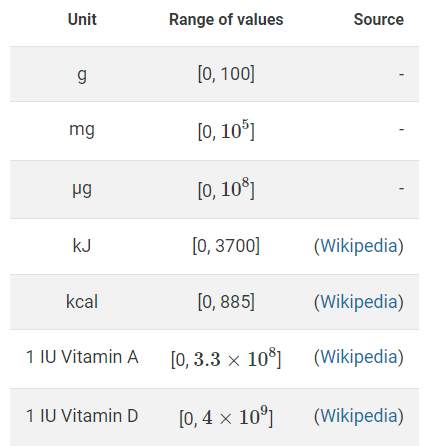 


4. Columns in our data set may be related to each other or pose constraints on one another. Unfortunately, this may also give rise to inconsistencies. Allowing for some rounding errors, your task is to investigate the three cases below and address any problems.
    * a. The column energy_per_hundred measures the energy content in kJ. Analyse its relationship with the column energy_kcal_per_hundred, for example using a scatterplot, identify potential problems and address them.
    * b. The column energy_per_hundred is also related to the macronutrient columns (protein, fat, carbohydrates, salt, and fiber), because these macronutrients have a specific energy content in kJ per hundred gram (e.g. fat 37 kJ/g, protein and carbohydrates 17 kJ/g). Check these columns for potential inconsistency.
    * c. The main macronutrients (protein, fat, carbohydrates, and fiber) make up the bulk of a product. However, the overall contribution per hundred gram is limited by the presence of other macronutrients. Check for inconsistency.

5. Despite removing recording errors from the per_hundred columns, some of them still contain “extreme” values, which are distinct from the rest of the data points. Your goal is to pick a few variables from the per_hundred list and address outliers. Be mindful that some outlier detection approaches are not reliable when the underlying variables are strongly skewed.

### 1. Categorical variables :
    * Number of unique values in each categorical variables: 

In [ ]:
df_categorical_variables = pd.DataFrame(
    {
        "Categorie": df[df.columns.intersection(df_object)].apply(lambda x: x.unique() ,axis=0),
        "Count": df[df.columns.intersection(df_object)].apply(lambda x: len(x.unique()) ,axis=0)
    }
)
print_full(df_categorical_variables.sort_values(by = ["Count"], ascending=False)) 

  * Show the proportion of samples in each categorical level in the variables country and unit using appropriate visualizations.

In [ ]:
# df[["country", "barcode"]].groupby("country").count()
# df[["unit", "barcode"]].groupby("unit").count()

Plots of proportion for the variables country and unit : 

In [ ]:
def addlabels(plt, x, colormap): #function coming from : https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/; with modifications
    for i in range(len(x)):
        plt.text(x[i]//2 + 25000,i-0.06, x[i], ha = 'left', bbox = dict(facecolor = colormap[i], alpha =.5))#, color = "white")


fig, axes = plt.subplots(nrows = 1, ncols = 2 , figsize = (10,4)) # sets the width and height of the figure (in inches)
                
#First plot : proportion per country
df_to_plot = df[["country", "unit"]].groupby("country").count()

values = df_to_plot.sort_values(by = ['unit'], ascending=False)['unit']
colormap = plt.cm.tab20(range(0, len(values)))
axes[0].barh(values.index,values,color=colormap)
addlabels(axes[0], values, colormap)
axes[0].set_title("Country proportions")
axes[0].set_xlabel("numbers of samples per country")

#Second plot : proportion per unit
df_to_plot = df[["country", "unit"]].groupby("unit").count()

values = df_to_plot.sort_values(by = ['country'], ascending=False)['country']
colormap = plt.cm.tab20(range(0, len(values)))
axes[1].barh(values.index,values,color=colormap)
addlabels(axes[1], values, colormap)
axes[1].set_title("Units proportions")
axes[1].set_xlabel("numbers of samples per unit type")


fig.tight_layout()
plt.show()

One major categorie  is present for this two variables.

### 2. Numerical variables : 

Provide descriptive statistics (e.g., min/max/mean) with informative plots (e.g., histograms) of the numerical variables. You should obtain these plots as subplots.

First we have two list of numerical columns df_flot64 and df_int :

In [ ]:
df_numerical_variable = pd.DataFrame(
    {
        "min": round(df[df.columns.intersection(df_float64 + df_int64)].min(),3),
        "mean": round(df[df.columns.intersection(df_float64 + df_int64)].mean(),3),
        "max": round(df[df.columns.intersection(df_float64 + df_int64)].max(),3),
    }
)
print_full(df_numerical_variable)

Subplot of distribution for each variable :

In [ ]:
list_numerical_col = df.columns.intersection(df_float64 + df_int64)

nb_cols = int(np.sqrt(len(list_numerical_col)))
nb_rows = int(np.sqrt(len(list_numerical_col))) + 1

fig, axes = plt.subplots(nrows = nb_rows, 
                         ncols = nb_cols, 
                         figsize = (3*nb_cols,3*nb_rows)) # sets the width and height of the figure (in inches)
x = 0
y = 0
for i in range(len(list_numerical_col)):
    values = df[list_numerical_col[i]]
    axes[x,y].hist(values)
    axes[x,y].set_xlabel(list_numerical_col[i], fontsize=7)
    
    if (y+1)/nb_cols == 1:
        y = -1
        x = x + 1
    y = y + 1
    
        
fig.tight_layout()

plt.show()

The distribution of values aren't centered. We have a high peak at the begining of the distribution and visibly a really small amount of samples with high values.

### Errors and unrealistic values : 

Identify and address problematic values of the per_hundred columns (e.g. protein_per_hundred, fat_per_hundred, etc.). Afterwards re-run the descriptive statistics and plots to check everything is ok now.
    
- Below are some additional tips and hints.
    - Work with the lists of columns ending in per_hundred and _unit. Each nutrient should have an associated per_hundred-column and a _unit-column.
    - The range of acceptable values in each per_hundred-column depends on the unit given in the associated _unit-column. For example, the unit for the protein_per_hundred column is found in the protein_unit column, etc.
    - As the unit of the protein_per_hundred column is g the values in the protein_per_hundred column should range between 0  and 100.
    - If a column’s unit is mg, then the values should range between 0 and 10^5.
    - If a column’s unit is in International units (IU), you can use the “Mass equivalents of 1 IU” indicated on this [Wikipedia page on IU](https://en.wikipedia.org/wiki/International_unit) and this [Wikipedia page on Food energy](https://en.wikipedia.org/wiki/Food_energy) to define an upper threshold value.

We focus on column 'per_hundred' : 
- 1. We list the properties concerned
- 2. We check the first assumption : each column 'per_hundred' have a column '_unit'
- 3. We establish a dataframe with the min and max rules 
- 4. We check that the value are comprise into our dataframe rules functon of the unit if not we replace it with a NaN

In [ ]:
#1. List of sample potential properties :
list_sp_property = list()

for colname in df[df.columns.intersection(df_per_hundred)] :
    x = colname.split('_per')
    list_sp_property.append(x[0])

list_sp_property
 

In [ ]:
#2. which columns are associated to this property :
for i in range(len(list_sp_property)) :
    list_sp_property[i]
    print(list_sp_property[i])
    l =len(list(filter(lambda colname: list_sp_property[i] in colname, list(df.columns))))
    print(l)
    col =list(filter(lambda colname: list_sp_property[i] in colname, list(df.columns)))
    print(col)
   
# Every element have a unit column

In [ ]:
#3. We list the unit  and create a table of rules based on wikipedia info:
# When we check the unit variables, from the catagorical varaible analysis, we saw that they are consistent : Each column have only one unit type into this list of unit : UI, g, mg, μg, kCal, kJ.

list_unit =['IU', 'g','mg', 'µg', 'kCal', 'kJ']
list_min = [0,0,0,0,0,0]
list_max = [0.4*(10**9),100,10**5,10**8,885,3700]

df_unit_rules = pd.DataFrame(
    {
        "unit": list_unit,
        "min": list_min,
        "max": list_max,
    }
)
df_unit_rules

In [ ]:
## It take 30 min 
## count_replacement = list()
#df_copy = df#[48989:48992] #To remove here and replace df_copy by df into the section [284]
#df_copy

def match_unit(df_test):
    unit = df_test[1]
    value = float(df_test[0])
    if not pd.isna(value) :
        max_range = df_unit_rules[df_unit_rules['unit'] == unit]['max']
        if float(value) < float(max_range) :
            return value
        
# This section take time :        
for i in range(len(list_sp_property)) :
    df[list_sp_property[i]+'_per_hundred'] = df[[list_sp_property[i]+'_per_hundred',list_sp_property[i]+'_unit']].apply(match_unit, axis = 1)
    
#i=27
#list_sp_property[i]
#df_copy[[list_sp_property[i]+'_per_hundred',list_sp_property[i]+'_unit']].apply(match_unit, axis = 1)

# for i in range(len(list_sp_property)) :
#   df_copy[list_sp_property[i]+'_per_hundred'] = df[[list_sp_property[i]+'_per_hundred',list_sp_property[i]+'_unit']].apply(match_unit, axis = 1)

In [ ]:
#Too long : ALternate solution should be for each colonne drop out row who didn't respect the test: 
list_per_hundred_col = df.columns.intersection(df_per_hundred)
int(np.sqrt(len(list_per_hundred_col))) + 1

***Note to myself : come back here if necessaries. I'm not convince at all by my work but i will not spend more time on this exercice now.***

In [ ]:
list_per_hundred_col = df.columns.intersection(df_per_hundred)

nb_cols = int(np.sqrt(len(list_per_hundred_col)))
nb_rows = int(np.sqrt(len(list_per_hundred_col))) #+ 1

fig, axes = plt.subplots(nrows = nb_rows, 
                         ncols = nb_cols, 
                         figsize = (3*nb_cols,3*nb_rows)) 

x = 0
y = 0
for i in range(len(list_per_hundred_col)):
    values = df[list_per_hundred_col[i]] #df_copy[list_per_hundred_col[i]]
    axes[x,y].hist(values)
    axes[x,y].set_xlabel(list_per_hundred_col[i], fontsize=7)
    
    if (y+1)/nb_cols == 1:
        y = -1
        x = x + 1
    y = y + 1
    
        
fig.tight_layout()

plt.show()

For the distribution we observed some changes for certains column not all. ***Describe changes*** No big visible changes execpt for the energ

4. Inconsistency between energy columns :
    * a. The column energy_per_hundred measures the energy content in kJ. Analyse its relationship with the column energy_kcal_per_hundred, for example using a scatterplot, identify potential problems and address them.
    * b. The column energy_per_hundred is also related to the macronutrient columns (protein, fat, carbohydrates, salt, and fiber), because these macronutrients have a specific energy content in kJ per hundred gram (e.g. fat 37 kJ/g, protein and carbohydrates 17 kJ/g). Check these columns for potential inconsistency.
    * c. The main macronutrients (protein, fat, carbohydrates, and fiber) make up the bulk of a product. However, the overall contribution per hundred gram is limited by the presence of other macronutrients. Check for inconsistency.



In [ ]:
plt.plot(df['energy_per_hundred'],df['energy_kcal_per_hundred'], 'o')
plt.xlabel("energy per hundred (kJ)")
plt.ylabel("energy per hundred (kCal)")

plt.show()

Between energy in kJ and energy in kCal the difference is linear : 1 KJ = 1/4.184 kCal. We expect that the comparison between this two columns show point distributed on a straight line. Some points aren't on the diagonal, which means they have either a wrong estimate of energy in kcal or a wrong estimate of energy in kJ or both. We have to re-estimate this points base on their content in fat carbohydrates, fiber and protein. 

We will re-estimate the enegertic values :

In [ ]:
def energy_kJ(df_test):
    #print(df_test)
    df_test.fillna(0, inplace=True)
    #print(df_test)
    if(sum([df_test['carbohydrates_per_hundred'], df_test['fat_per_hundred'], df_test['fiber_per_hundred'], df_test['protein_per_hundred']]) <= 100):# if this is above 100 it's mean there is an error
        value = sum([df_test['carbohydrates_per_hundred'] * 17, df_test['fat_per_hundred'] * 37, df_test['fiber_per_hundred'] * 8, df_test['protein_per_hundred'] * 17])
        #print(value)
        return value


df['energy_per_hundred_estimated']= df[['energy_per_hundred','energy_kcal_per_hundred','carbohydrates_per_hundred','fat_per_hundred', 'fiber_per_hundred','protein_per_hundred' ]].apply(energy_kJ, axis=1)


plt.plot(df['energy_per_hundred'],df['energy_per_hundred_estimated'], 'o')
plt.xlabel("energy per hundred (kJ)")
plt.ylabel("energy per hundred (kJ) estimated")

plt.show()

We find that the energy value is often underestimated, sometimes even reduced to 0. We don't want to introduce any new missing values. Futhermore, by taking only macronutrients into account, the energy value may be underestimated. 

In other cases, we find that we estimate a value for certain elements with energy values at 0 or lower than the energy value of macronutrients alone. 

Replacing only the energy values in kJ of those elements whose value is estimated to be higher than the present value enables us to complete and correct erroneous values based on other indicators. The kCal value is corrected to the kJ value.

In [ ]:
def energy_kJ(df_test):
    #print(df_test)
    df_test.fillna(0, inplace=True)
    #print(df_test)
    if(sum([df_test['carbohydrates_per_hundred'], df_test['fat_per_hundred'], df_test['fiber_per_hundred'], df_test['protein_per_hundred']]) <= 100):# if this is above 100 it's mean there is an error
        value = sum([df_test['carbohydrates_per_hundred'] * 17, df_test['fat_per_hundred'] * 37, df_test['fiber_per_hundred'] * 8, df_test['protein_per_hundred'] * 17])        
        if value < df_test['energy_per_hundred']: 
            value = df_test['energy_per_hundred']
        #print(value)
        return value

#df_copy = df[1:10]     
df['energy_per_hundred_estimated']= df[['energy_per_hundred','energy_kcal_per_hundred','carbohydrates_per_hundred','fat_per_hundred', 'fiber_per_hundred','protein_per_hundred' ]].apply(energy_kJ, axis=1)
#df['energy_kcal_per_hundred_estimated']=df['energy_per_hundred']/4.184

plt.plot(df['energy_per_hundred'],df['energy_per_hundred_estimated'], 'o')
plt.xlabel("energy per hundred (kJ)")
plt.ylabel("energy per hundred (kJ) estimated")

plt.show()

In [ ]:
df['energy_per_hundred']= df['energy_per_hundred_estimated']
df['energy_kcal_per_hundred']=df['energy_per_hundred']/4.184

5. Despite removing recording errors from the per_hundred columns, some of them still contain “extreme” values, which are distinct from the rest of the data points. Your goal is to pick a few variables from the per_hundred list and address outliers. Be mindful that some outlier detection approaches are not reliable when the underlying variables are strongly skewed.

We will not come back on energy columns or on macronutriment column (with sugaer too, the distribution is mono-modal). 

We focus on this columns : 


In [ ]:
col_outlier = ['calcium_per_hundred', 'cholesterol_per_hundred', 'fatty_acids_total_saturated_per_hundred', 
               'fatty_acids_total_trans_per_hundred', 'fiber_per_hundred', 'iron_per_hundred', 'monounsaturated_fatty_acids_per_hundred', 
               'polyunsaturated_fatty_acids_per_hundred', 'potassium_k_per_hundred', 'salt_per_hundred', 'sodium_per_hundred', 
               'vitamin_a_iu_per_hundred', 'vitamin_b1_thiamin_per_hundred', 'vitamin_b2_riboflavin_per_hundred', 'vitamin_b3_niacin_per_hundred', 
               'vitamin_c_ascorbic_acid_per_hundred', 'vitamin_d_d2_d3_international_units_per_hundred']

df[col_outlier].shape

All data are skewed (right-skewed) so in place of using a filter based on the standard deviation ((x-x.mean()) < 3 * x.std()) we will discard values > to the quantile(0.9) 10% of max value) :

In [ ]:
# df_copy[col_outlier].apply(lambda x:  np.NaN if np.abs(x - x.mean()) > (3 * x.std()) else x, axis = 1  ) # NaN unsupported

for col in col_outlier:
    
    print(col)
    #zfilter_df = np.abs(df[col] - df[col].mean()) > (3 * df[col].std())
    #df[col][zfilter_df] = np.NaN
    threshold = df[col].quantile(0.90)
    df.loc[df[col] > threshold ,col] = np.NaN
    
    #plt.boxplot(df[col].dropna())
    #plt.hist(df[col])
    #plt.xlabel(col)
    #plt.show()



In [ ]:
list_per_hundred_col = df.columns.intersection(df_per_hundred)

nb_cols = int(np.sqrt(len(list_per_hundred_col)))
nb_rows = int(np.sqrt(len(list_per_hundred_col))) #+ 1

fig, axes = plt.subplots(nrows = nb_rows, 
                         ncols = nb_cols, 
                         figsize = (3*nb_cols,3*nb_rows)) 
 

x = 0
y = 0
for i in range(len(list_per_hundred_col)):
    values = df[list_per_hundred_col[i]] #df_copy[list_per_hundred_col[i]]
    axes[x,y].hist(values)
    axes[x,y].set_xlabel(list_per_hundred_col[i], fontsize=7)
    
    if (y+1)/nb_cols == 1:
        y = -1
        x = x + 1
    y = y + 1
    
        
fig.tight_layout()

plt.show()

Everything isn't perfect but data are more contain, less outlier are visible. vitamin b1 d d2 d3 seems multi-modal. That could be outlier but that could indicate that some kind of product have typical vitamin content. 

The task C is long to execute: So we save the output and we will redownload it for the next task :

In [ ]:
f = 'Ressources/df_taskC.csv'
df.to_csv(f, index=False) 

# compression_opts = dict(method='zip', archive_name= f)
# df.to_csv('Ressources/df_taskC.zip', index=False, compression=compression_opts) 

<a id="TaskD"></a>
## OpenFood database : Task D
[top](#top)

###  EDA : Text data 

In this task, you will work with the ingredients_en column; your goal is to preprocess the text data in this column and answer the following questions.

1. Find the product with the longest ingredients list, i.e. the largest number of ingredients. Print the product name and its ingredient list.
2. Find the products with the shortest ingredients list, i.e. the fewest ingredients. Display some examples and comment on your observation.
3. Which are the most frequent ingredients in products? You will also choose an appropriate method to visualize your findings.

Be careful with text normalization:

- punctuation, e.g., “water.” vs. “water”
- capitalization, e.g., “water” vs. “Water”
- white spaces removal, e.g., “ water” vs. “water”
- special characters, e.g. “raw beef [soja sauce (with ble), …]”


In [ ]:
#Task D library : 
import matplotlib.pyplot as plt
import seaborn as sns
#import numpy as np
import pandas as pd
import re
import nltk

%matplotlib inline

In [ ]:
filename = "Ressources/df_taskC.csv"
df_C = pd.read_csv(filename,low_memory=False) #to remove it was to check if the import was OK. Even with the error below
df=df_C

### Ingredient list format : preproccess  
- Firstly we need to see how ingredient is listed :  

In [ ]:
print_full(df.loc[0:10,'ingredients_en'])
print_full(df['ingredients_en'].sample(10))

By choosing random samples, we find that, in most cases, ingredients are separated by a comma.

In [ ]:
#25 elements with the shortest list of ingredients
list_ingredients = df['ingredients_en']
type(list_ingredients)
list_ingredients = sorted(list_ingredients, key=len)
list_ingredients[0:25]  #what is COD ? a fish 

In [ ]:
#5 elements with the longest list of ingredients
list_ingredients = sorted(list_ingredients, key=len, reverse=True)
list_ingredients[0:5] 

ingredients are often word composed. we should remove : 
- \r \n
- special caracters as : ()*\%[]" except : ***,***
- numbers
- stopword
- word "following" and others not ingredient related word as contain, contains, preserve, freshness, ingredient, ingredients, traces ...

Then we group as token between two comma ","

In [ ]:
# Load English stopwords from nltk
#import nltk

nltk.download("stopwords", quiet=True)

from nltk.corpus import stopwords

stopwords_english = stopwords.words("english")
print(stopwords_english)

In [ ]:
def transform(s): # remove - \r \n, - special caracters as : ()*\%[]" except : ***,***, - numbers
    s = s.str.replace("\n", " ", regex=True)
    s = s.str.replace("\r", " ", regex=True)
    s = s.str.replace(":", ",", regex=True) #":", "and", ".", "(",")","[","]" are replace by comma
    s = s.str.replace("^and", ",", regex=True)
    s = s.str.replace(".", ",", regex=True)
    s = s.str.replace("(", ",", regex=True)
    s = s.str.replace(")", ",", regex=True)
    s = s.str.replace("[", ",", regex=True)
    s = s.str.replace("]", ",", regex=True)
    s = s.str.replace(r'[^a-zA-Z, ]', " ", regex=True)
    s = s.str.replace(r'[0-9]', "", regex=True)
   
    return s

In [ ]:
from collections import Counter

def flatten_extend(matrix): #code source : https://realpython.com/python-flatten-list/
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list


list_ingredients = df['ingredients_en']
list_ingredients3 = transform(list_ingredients.str.lower())
list_ingredients3 = list_ingredients3.str.replace(',', ' ', regex=True)
list_ingredients3 = list_ingredients3.str.replace(' +', ' ', regex=True)
list_ingredients4 = [tok for tok in flatten_extend(list_ingredients3.str.split()) if tok not in stopwords_english]

len(list_ingredients4)

In [ ]:
#print_full(list_ingredients3[0:5])
Counter(list_ingredients4).most_common(100)#200

list of word  to add to the words to remove : 'less','contain', 'contains','ingredient', 'ingredients', 'freshness','following', 'culture', 'cultures', 'cultured','missing', 'preservative'.

In [ ]:
#List upadated by word seeing
stopwords_english.extend(('less','contain', 'contains','ingredient', 'ingredients', 'freshness','following', 'culture', 'cultures', 'cultured','missing', 
                          'preservative','trace','traces', 'agricultural', 'products','farming', 'minimum','accordance','st', 'ards', 'total', 'weight', 'mass', 'balance',
                          'come', 'farms', 'é', 'er', '---', 'content', 'fairtrade', 'standards','converted'))
print(stopwords_english)

Now we compile our preprcocessing work into one function :

In [ ]:
def process_text_to_token(text):
    
    '''
    This function :
    - Removes stop words
    - Splits text on comma
    
    INPUT: 
    - text: "raw" text (string)
    
    OUTPUT:
    - processed_sample_tokens: list of tokens (list of strings)
    '''
    #text = text.replace(",", " ,")
   # text = re.sub(' +', ' ',text)
    

    #s = re.sub('\b|^'.join(stopwords_english),'',s) #ne fonctionne pas
    wordsToRemove = (r'\b%s\b' % r'\b|\b'.join(map(re.escape,stopwords_english)))
    text =re.sub(wordsToRemove, "", str(text))
    text = re.sub(' +', ' ',text)
   
    # Remove stop words and split on whitespace
    processed_sample_tokens = [tok.strip() for tok in text.split(',')]# if tok not in stopwords_english]
    
    #processed_sample_tokens = re.sub(' +', ' ',str(processed_sample_tokens))
    
    while("" in processed_sample_tokens):
        processed_sample_tokens.remove('')
    
    # remove duplicate ingredients
    processed_sample_tokens = list(dict.fromkeys(processed_sample_tokens))
    
    return processed_sample_tokens

In [ ]:
list_ingredients = df['ingredients_en']

# remove sepcial characters and more
list_ingredients = transform(list_ingredients.str.lower())

# To identify a list of word used not in relation with ingredient :
list_ingredients = [process_text_to_token(ingredients) for ingredients  in  list_ingredients]

#Remove duplicate ingredient in lists 
df['ingredients_en'] = list_ingredients
print(df['ingredients_en'][0])


In [ ]:
print_full(df['ingredients_en'][0:5]) #I'm retaining my self to comment on water organic... Because if your "Bio spaghetti" are organic because it has organic water in it, that's debatable.

### 1. Product with the longest ingredients list : 
- We can looking for the product with the longest list of ingredients: 

In [ ]:
s = df.ingredients_en.str.len().sort_values(ascending=False).index
print_full(df.loc[s[0:1],['product_name_en','ingredients_en']].head())
print(df.loc[s[0:1],['product_name_en','ingredients_en']].values) #To show the entierety of the ingredients_en cell


Even after removing duplicate ingredient (token) we saw some repetition in this list as with : 
- 'cheddar cheese', 
- 'cheese'
- 'cheddar'
- 'blue semi soft cheese'
- 'cheddar club cheese' <- this one mean nothing

- 'buttermilk solids'
- 'buttermilk'

- 'whey protein concentrate'
- 'whey'

or : 
- 'bleached enriched wheat flour'
- 'bleached wheat flour'
- 'wheat'

or:
- 'cooked ham', 
- 'ham'

or :
- 'bacon bits' 
- 'bacon'

The ingredient is duplicate but the token is not the same. 

And we have this token: 
- 'soybean canola oil'
which is a bit weird

and this one which is not related to an ingredient :
- 'may'

The transformation introduce some error as : 'di', 'triglycerides' and this could refer to 'di and triglycerides'

Somes element refer to nothing understandable as : 'x', 'l'

This ingredient list is not perfect.  

### 2. Products with the shortest ingredients list : 
- We can looking for the (20) products with the shortest list of ingredients: 

In [ ]:
df2 = df[['product_name_en','ingredients_en']].assign(ingredient_length=df['ingredients_en'].str.len()).sort_values('ingredient_length')
df2[df2['ingredient_length'] > 0].head(20)

The element with the fewest ingredient have 1 ingredient. 
I saw one error : 100% PURE PREMIUM ORANGE JUICE FROM CONCENTRATE	 ->[filtered water orange juice concentrate], this element should have two ingredients listed : 'filtered water', 'orange juice concentrate'. In this case it's highly probable that the ingredient have not been separete by a comma or any other separator. But as we can see in this list. There is more entry with one ingredient describe by many word than entry with many ingredient list in one token.

### 3. Most frequent ingredients in products :

We will display the 50 most frequent ingredients with a bar chart :

In [ ]:
list_ingredients = flatten_extend(df['ingredients_en'])
ingredient = Counter(list_ingredients).most_common(50)#200

# Barplot and font specifications
barplot_specs   = {"color": "mediumpurple", "alpha": 0.7, "edgecolor": "grey"}
title_specs     = {"fontsize": 14, "fontweight": "bold", "y": 1.2}
label_specs     = {"fontsize": 13}

plt.figure(figsize=(15,3))
plt.bar(*zip(*ingredient), **barplot_specs)
plt.title('Most frequent ingredients', **title_specs)
plt.ylabel('Word counts', **label_specs)
plt.xticks(rotation=90)
plt.show()

The three most pressent ingredients are : salt, sugar and water. 

<a id="TaskE"></a>
## OpenFood database : Task E
[top](#top)

### EDA times-series data

In this task, you will work with the created_at column that stores the date and time at which products were added to the Open Food database. You will analyze the total number of products added to the database.
- 1. Draw heatmap with the hours on x axis qnd month on y axis the color should show the number of items created at each month_hour pair. 
- 2. Draw a bar plot  of the total number of items over time. Each bar in the plot should stack the number of items created by each country each month.

### 1. Draw heatmap 

Firstly we will check in which form information is save into created_at column. we need to check the type and if it'snot the case to attributed the date type to this column

In [ ]:
df["created_at"].head()

We convert the created_at column in a datetime format :

In [ ]:
dates = pd.to_datetime(df["created_at"])
df["created_at"] = dates
df["created_at"].head()

We will create our own dataframe to generate  an heatmap plot :

In [ ]:
df_dates = pd.DataFrame(
    {
        "dates": pd.to_datetime(df["created_at"]),
        "year": pd.DatetimeIndex(pd.to_datetime(df["created_at"])).year,
        "month": pd.DatetimeIndex(pd.to_datetime(df["created_at"])).month,
        "hour": pd.DatetimeIndex(pd.to_datetime(df["created_at"])).hour,
        "country": df["country"] #this column will serve for the second task
    }
)
df_dates.head()

In [ ]:
# We create a pivot_table to get the count per month per hour
pivot_table = df_dates.pivot_table(index='hour', columns='month', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.xlabel('Month')
plt.ylabel('Hour')

plt.show()

We saw that most of the entry have been made at a specific combinaison of month-hour around 10 AM in April.Except this we saw that in generall the input are done between 7 Am and 8 PM Some have been made later in june and july, until midnight.  It's difficult to detailled more or identify some others information du to big difference of values between the importqnt number of entry done around 10 AM in April in comparaison to the rest.

### 2. Draw barplot

In [ ]:
count_per_month = df_dates.groupby(['year','month','country'])['dates'].count().reset_index(name='counts')
count_per_month.head()

The countries UK and AT are not plot on the bar plot in the example So we will discard them for the barplot.

In [ ]:
count_per_month = count_per_month.loc[~count_per_month['country'].isin(['UK','AT'])]

In [ ]:
df_count_per_month = pd.pivot_table(count_per_month, values='counts',  index=['year', 'month'], columns=['country'], aggfunc="sum").reset_index()
df_count_per_month

In [ ]:
#df_count_per_month.index = pd.to_datetime(df_count_per_month.month.astype(str) + "-" + df_count_per_month.year.astype(str))
df_count_per_month.index =df_count_per_month.year.astype(str)+"-"+df_count_per_month.month.astype(str).str.zfill(2)
df_count_per_month.head()

In [ ]:
# plot data in stack manner of bar type
df_count_per_month[count_per_month.country.unique()].plot( kind='bar', stacked=True,figsize=(14, 4))
plt.yscale("log")

plt.xlabel('Date')
plt.ylabel('Number of product created')
plt.title('Number of Entries per Month and per Country')

plt.show()

We see that they are a high pick of entries in april 2024 from US. We can do an heatmap without the US data to better see how other country entries are accross hour and month.

In [ ]:
df_dates = df_dates[df_dates.country != "US"]

# We create a pivot_table to get the count per month per hour
pivot_table = df_dates.pivot_table(index='hour', columns='month', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.xlabel('Month')
plt.ylabel('Hour')

plt.show()

<a id="TaskF"></a>
## OpenFood database : Task F
[top](#top)

### EDA Correlation analysis

In this task, you will do quantitative and qualitative correlation analysis for some of the columns in the data: 

1. Quantify the **linear** relationships between the energy_per_hundred and the per_hundred columns by analysing their correlation with each other.
2. Reveal the true nature of the relationship, **linear or non-linear**, between variables, using visualizations. Based on the correlation coefficients you found in the previous task, pick the three most correlated and the three least correlated nutrients (in absolute terms) with the energy_per_hundred column. Plot them against the energy_per_hundred column, using scatterplots. You should obtain these plots as subplots (with 2 rows and 3 columns) or as seaborn pairplots. Please comment on the visual relationships in a markdown cell. Are they all linear? Are there still extreme values that, once removed, relationships would change?
3. Test the independence of two **categorical variables statistically**. Use the energy_per_hundred column to create a new variable that holds equal proportion of values in three categories low energy, medium energy and high energy. Test if the level of energy in the product is associated with the country where the product is produced.

### 1. A linear relationship between energy_per_hundred and the others per_hundred columns

A linear relationship can be seen with a correlation analysis. 
Firstly we will quantify the correlation between the per_hundred coluns and verifiyed the ones that interested us, the one between energy_per_hundred and the others :

In [ ]:
#Library
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr 
import matplotlib.pyplot as plt
%matplotlib inline 

We have define in **task A** the list of per_hundred columns from thye df dataframe, and in task B reduce the number of columns :

In [ ]:
df_per_hundred = df.columns.intersection(df_per_hundred)
print(df_per_hundred)

Thanks to this list and the pandas function corr() we can generate a correlation matrix between this columns :

In [ ]:
corr_matrix = df[df_per_hundred].corr()
df_corr_to_energy_per_hundred = pd.DataFrame({"Corr": corr_matrix['energy_per_hundred']},
                  index=df_per_hundred)
#df_corr_to_energy_per_hundred

By selecting only the column 'energy_per_hundred' we can see the correlation specific to this column : 

In [ ]:
fig, ax = plt.subplots(figsize=(5,8))         
sns.heatmap(df_corr_to_energy_per_hundred, annot=True, fmt="g", cmap='YlGnBu', cbar=True)
plt.show()

We can analyze the linear correlation based on this correlation value. Between 2 variables, a correlation is considerate as low between from -0.5 to 0.5 and strong below -0.5 to 1 and above 0.5 to 1. If we look in detail in the result, we don't see strong negative correlation, but we can see some strong positive correlation between 'energy_per_hundred' and :

In [ ]:
#ls_corr = df_corr_to_energy_per_hundred.loc[(df_corr_to_energy_per_hundred["Corr"]> 0.5)].index
df_corr_to_energy_per_hundred.loc[(df_corr_to_energy_per_hundred["Corr"]> 0.5)]


### 2. Linear and non-linear relationship: 
We will select the three most correlated and least correlated in absolute value to the energy_per_hundred column and plot them :
I decide to remove the energy_per_hundred and the energy_kcal_per_hundred correlation analyse. The energy_kcal_per_hundred is a linear transformation of the energy_per_hundred. 

In [ ]:
df_corr_to_energy_per_hundred = df_corr_to_energy_per_hundred.loc[~df_corr_to_energy_per_hundred.index.isin(['energy_per_hundred','energy_kcal_per_hundred'])]

df_corr_to_energy_per_hundred["abs_corr"] = df_corr_to_energy_per_hundred["Corr"].abs() 
df_corr_to_energy_per_hundred

We select the 3 most and least correlated:

In [ ]:
list_most_corr = df_corr_to_energy_per_hundred.sort_values(by=['abs_corr'], ascending=False)[0:3].index
list_least_corr = df_corr_to_energy_per_hundred.sort_values(by=['abs_corr'])[0:3].sort_values(by=['abs_corr'], ascending=False).index # There, I sort a second time to reorder the 3 least correlated from the most to the least.
list_most_least_corr = list_most_corr.append(list_least_corr)
df_corr_to_energy_per_hundred.loc[list_most_least_corr]

With pairplot we plot this six variable against 'energy_per_hundred':

In [ ]:
#https://stackoverflow.com/questions/50832204/show-correlation-values-in-pairplot
def corrfunc(x, y, hue=None, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    nas = np.logical_or(x.isna(), y.isna())#To dropna
    r, _ = pearsonr(x[~nas], y[~nas])
    ax = ax or plt.gca()
    ax.annotate(f'r = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

In [ ]:
sns.set_palette(palette="pastel")

g = sns.pairplot( 
    df,
    y_vars=list_most_least_corr,
    x_vars='energy_per_hundred'
)

g.map_lower(corrfunc) # I don't understand why no correlation is plot on the first plot.
g.fig.set_size_inches(4,4*len(list_most_least_corr))

plt.show()

- We saw that the first plot seems correlated. It's explained by the fact that we correct 'energy_per_hundred' with fat_per_hundred column and it's the element which could have potentially the most important impact on the 'energy_per_hundred' of each entry.
- The 'saturated_fat_per_hundred ' and 'polyunsaturated_fatty_acids_per_hundred' attribute are components of 'fat_per_hundred'. Seeing a correlation between them and energy_per_hundred make sens. 
- calcium_per_hundred, salt_per_hundred and cholesterol_per_hundred share the same respond shape to 'energy_per_hundred' it's a large cloud of point without any respond pattern visible. 

The graph give some clue to understand how an element respond to an other.

At the question : **Are there still extreme values that, once removed, relationships would change?**

For energy_per_hundred at or close to 0, we observed high value point for 'saturated_fat_per_hundred ' and 'polyunsaturated_fatty_acids_per_hundred'. May be the value were missing in the fat_per_hundred column when information was there for this 2 columns and so the energy_per_hundred wasn't well estimated by us earlier. If we discard the point with a really low energy_per_hundred value we should increase correlation between energy_per_hundred and 'saturated_fat_per_hundred ' or 'polyunsaturated_fatty_acids_per_hundred'.


In [ ]:
## Should I plot and evaluate the correlation between mn and energy without the last mod of mn ???
df_en = df[df['energy_per_hundred'] > 0.5]
g = sns.pairplot( 
    df_en,
    y_vars=['fat_per_hundred', 'saturated_fat_per_hundred', 'polyunsaturated_fatty_acids_per_hundred'],
    x_vars='energy_per_hundred'
)

g.map_lower(corrfunc) # I don't understand why no correlation is plot on the first plot.

plt.show()

The correlation gain is to 0.02 and 0.01 for 'saturated_fat_per_hundred' and 'polyunsaturated_fatty_acids_per_hundred'. The relationship didn't change

### 3. Independence of two categorical variables statistically : energy_per_hundred vs country

1. We have to transform the quantitative variable energy_per_hundred into a qualitative variable :

To do that we will attribute the catagory based on the quantile : 
- "low energy" for entry with  energy_per_hundred <  quantile(energy_per_hundred)1/3
- "medium energy" for entry with  energy_per_hundred <   quantile(energy_per_hundred)2/3
- "high energy" for entry with  energy_per_hundred >   quantile(energy_per_hundred)2/3

Like this we should have 1/3 of each entry into one of this three category

In [ ]:
sns.displot(df, x='energy_per_hundred')
plt.show()

As we can see a large part of the data have a energy_per_hundred at 0. We will discard this entry for this analysis. 

In [ ]:
df_country_energy = df.loc[df['energy_per_hundred'] >0][['country','energy_per_hundred']]

sns.displot(df_country_energy, x='energy_per_hundred')
plt.show()

In [ ]:
onethird_energy_per_hundred = np.quantile(a=df_country_energy['energy_per_hundred'].dropna(), q=0.33)
twothird_energy_per_hundred = np.quantile(a=df_country_energy['energy_per_hundred'].dropna(), q=0.66)
median_energy_per_hundred = np.quantile(a=df_country_energy['energy_per_hundred'].dropna(), q=0.5)
print(onethird_energy_per_hundred, median_energy_per_hundred, twothird_energy_per_hundred) 

In [ ]:
df_country_energy['energy_level'] = df_country_energy['energy_per_hundred'].apply(lambda x: "low energy" if x < onethird_energy_per_hundred else ("medium energy" if  x < twothird_energy_per_hundred else "high energy") )
df_country_energy['energy_level']

In [ ]:
pd.crosstab(df_country_energy.energy_level, df_country_energy.country, margins=True)

Now we can test the hypothesis null which is : there is no difference in the energy level between product from different country:
But before that we have to remove category with less than 5 entry (country : "AT","UK").

In [ ]:
df_country_energy = df_country_energy.loc[~df_country_energy["country"].isin(["AT","UK"])]

df_count=pd.crosstab(df_country_energy.energy_level, df_country_energy.country, margins=True)
df_count

In [ ]:
chi_square, p_value, dof, matrix = stats.chi2_contingency(df_count)

print(chi_square,p_value)

The p_value is <0.05 so we reject the null hypothesis. There is a correlation between the level of energy and the country from where the product come from.
We have to test each country independently to understand the link between country and level of energy. But just based on the count table the proportion of product per pays differ in Italy and France in comparison to the three others country. We can see this better with a crosstable of the percentage of type of product into each country : 


In [ ]:
pd.crosstab(df_country_energy.energy_level, df_country_energy.country, normalize='columns')

<a id="TaskG"></a>
## OpenFood : Task G
[top](#top)

### Advanced EDA
Your task is to do an in-depth analysis of the organic vs. non-organic products distribution in the Open Food database. Look for terms such as “bio” and “organic” in the product names. Your analysis should address the following tasks:
- a) What is the total number of samples by country? Countries with very small sample size should be dropped from this analysis as their results may not be statistically significant.
- b) Count the number of organic and non-organic products in each country. Is there a country with a higher percentage of organic products?
- c) Totals or portions don’t give a very detailed picture. Compare the distributions of the macronutrients between organic and non-organic products in each country. Your solution method should include appropriate visualisations in the subplots format. Note that bar charts aren’t not the best way to communicate distributions.

#### Number of bio/organic sample per country 

Firstly we will add an organic : True/False column. If the term "bio", or "organic" appear in the product_name column, we suppose that the product is organic :

In [ ]:
import re

In [ ]:
print_full(df.loc[0:21,'product_name_en'])

In [ ]:
df['organic'] = df['product_name_en'].apply(lambda X : bool(re.search(r"bio[\s|-]", str(X).lower())) or ('organic' in str(X).lower())) #For bio I do an regular expression because this term could be found into other words as "probiotic" 

print_full(df.loc[0:10,['product_name_en','organic']])

In [ ]:
print_full(df.loc[df['organic']][['product_name_en','organic']].sample(25))

In [ ]:
pd.crosstab(df.organic, df.country, margins=True)

The total count of organic product per countries is of 1426 for Switzerland, 83 for Germany,6 for Italy, 1 for France, 16427 for US and null for Austria and UK. Based on this we should drop Austria AT, United-Kimgdom UK, and France FR. We keep Italy 6 > 5 which is the threshold of Chi-test, for example, to assure significance of the test. 

In [ ]:
df_organic = df.loc[~df["country"].isin(["AT","UK","FR"])]

#### Percentage of organic products
There the percentage of organic product per country:

In [ ]:
pd.crosstab(df_organic.organic, df_organic.country, normalize='columns', margins=True)

We saw that for each country we have a percent of organic product lower than 1 percent.

And there the organic/true row give for organic entry the percentage for each country : 

In [ ]:
pd.crosstab(df_organic.organic, df_organic.country, normalize='index', margins=True)

Most of the organic entry are US entry.
#### Distributions of the macronutrients between organic and non-organic products
Macronutrient are Carbohydrates, fat and protein. We create a list for macronutrients : 

In [ ]:
list_macro = ['fat_per_hundred','protein_per_hundred','carbohydrates_per_hundred']

With violin plot we can compare per macronutriment and country the distribution shape of values between organic and no-organic entries : 

In [ ]:
# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16, 4))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(list_macro, axes.ravel()):
    sns.violinplot(
        data=df_organic,
        y=col,
        x=df_organic["country"],
        ax=ax,
        palette="Set2",
        split=True,
        hue="organic",
    )
plt.tight_layout()

The distributions we observe on these violin plots show slight differences by country and by product type. The most pronounced difference is primarily between the distribution of the macronutrient carbohydrate compared to the macronutrients fat and protein. In the case of the carbohydrate macronutrient, we observe a bimodal distribution, likely associated to sweet and salty products (it's only an assumptions). This distribution observed is the same regardless of the country, but is less pronounced for organic products from Italy.